# Simle Linear Regression Project - Insurance Dataset

In this project I explored an insurance dataset and used a linear regression model to predict insurance charges.

- Dataset provided by: Miri Choi Kaggle
- Inspiration/guidance: Maven Analytics courses on EDA and regression modeling by Alice Zhao and Chris Bruehl. I used the courses by Maven Analytics as a starting point, and then expanded from there.


In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
insurance = pd.read_csv("insurance.csv")

### 1. Exploratory Data Analysis Part 1: Getting a feel for the data

Through EDA techniques I got a general sense of the overall dataset to identify basic trends, outliers and anything that struck me as interesting or odd.

- Using the .head() method I saw there were 6 features (age, sex, bmi, children, smoker, and region).
- Using the .info() method I saw there were 1338 entries and 1338 non null values (dataset was already cleaned on Kaggle).
- A basic histogram of charges showed that the data was right skewed, meaning that most of the values were clustered between 0-10000, and the counts dropped as the charges became greater.
- A quick scatterplot between age and charges showed a general trend that as age increased, charges increased. Intuitively, this is what I would expect.
- A value count of entries with children showed that almost half of the entries had no children, and very few entries had 4 or 5 children.

In [4]:
# getting to know the features of the dataset by using .head()

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# getting a summary of the dataset w/ .info()
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='charges', ylabel='Count'>

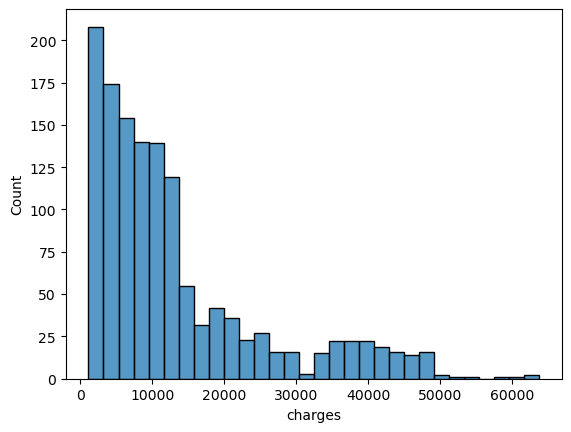

In [6]:
sns.histplot(insurance['charges'])

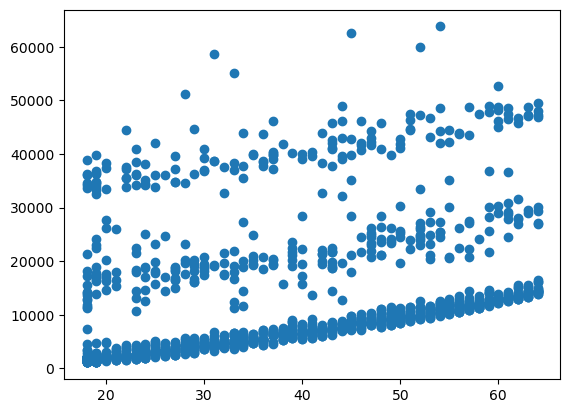

In [7]:
x = insurance['age']
y = insurance['charges']

plt.scatter(x,y)

<Axes: xlabel='children'>

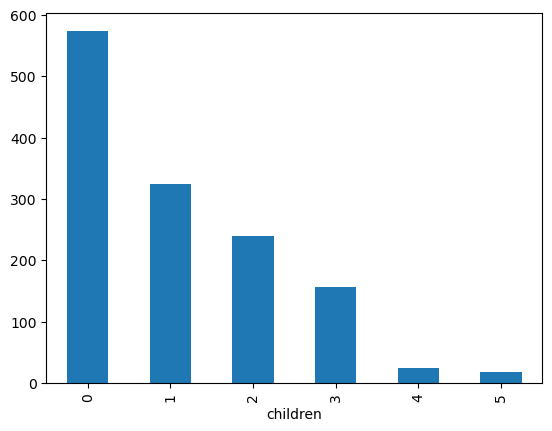

In [8]:
insurance['children'].value_counts().plot.bar()

### 2. EDA Part 2: Correlations; feature v. feature and feature v. target

- After getting a general sense of the data, I dove deeper into the correlations between the variables.
- A correlation heatmap of the numeric features showed very weak correlations between the numeric features and the charges.
- By isolating certain variables and viewing the mean charges I found:
    - The mean charge for smokers was far higher than the mean charge for non-smokers.
    - The mean charge for people in the southeast was higher than for any other region.
    - The mean charge for men was slightly higher than the mean charge for women.
    - Highlighting smoker status on the age v. charges plot showed that smoker status likely accounted for why the charges 
        appeared to be split into three tiers.

<Axes: >

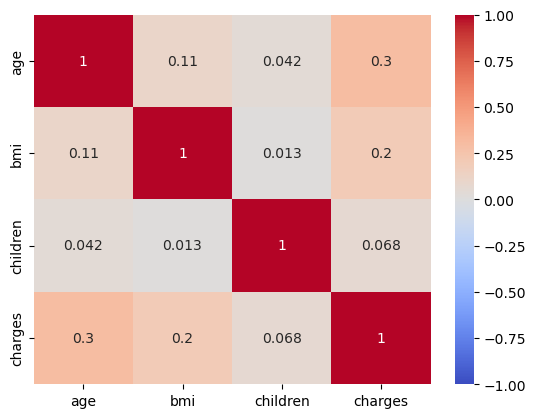

In [9]:
#heatmap/correlation matrix - shows very weak correlation between all numeric variables and charges

sns.heatmap(insurance.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap="coolwarm")

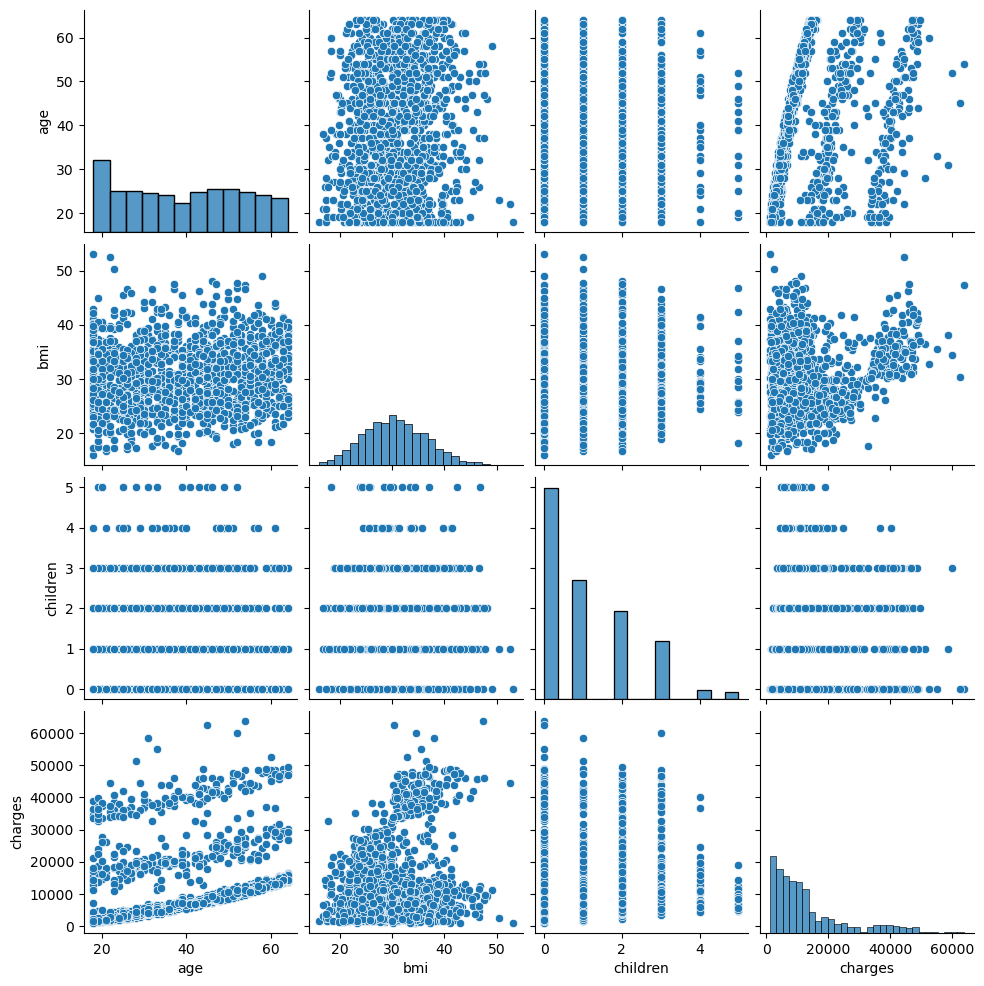

In [10]:
# a pairplot also confirmed the fairly weak correlations, with age having the strongest positive correlation with charges

sns.pairplot(insurance)

<Axes: ylabel='smoker'>

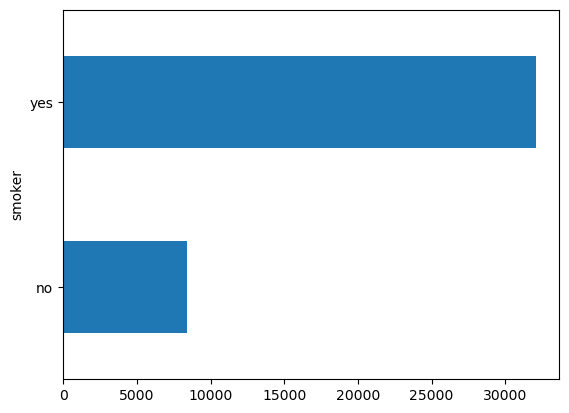

In [11]:
#isolating smoker status showed a stark increase in mean price for smokers

insurance.groupby("smoker")["charges"].mean().sort_values().plot.barh()

<Axes: ylabel='region'>

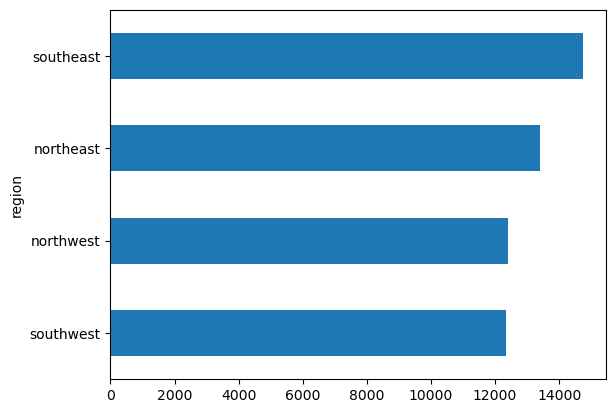

In [12]:
#isolating region showed the mean for the southeast region was the highest. 
# While smoker-status seems like a logical reason to increase insurance charges - region does not. This could be worth exploring more.

insurance.groupby("region")["charges"].mean().sort_values().plot.barh()

<Axes: ylabel='region'>

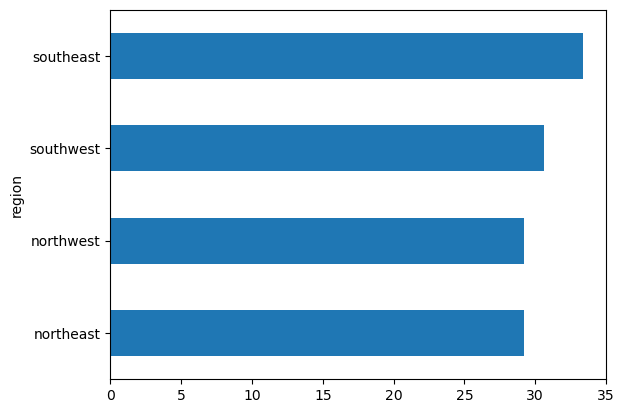

In [13]:
# Isolating bmi by region showed the average bmi in the southeast was highest
# This could be a reason for higher insurance charges in that area

insurance.groupby("region")["bmi"].mean().sort_values().plot.barh()

<Axes: ylabel='sex'>

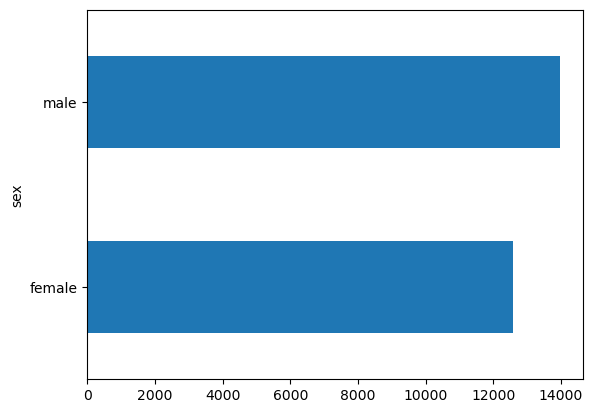

In [14]:
# isolating sex showed men had a slightly higher mean than women.

insurance.groupby("sex")["charges"].mean().sort_values().plot.barh()

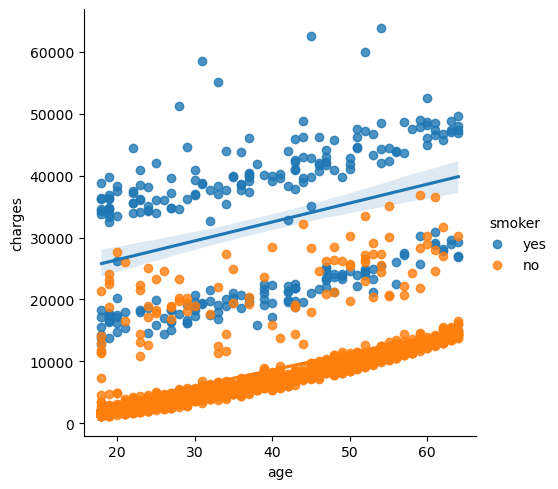

In [15]:
# adding in smoker as a hue in the scatterplot of age v charges, illuminates why the charges for age appear to be separated into three tiers.

sns.lmplot(insurance, x = "age", y = "charges", hue = "smoker")

### 3. EDA Part 3: Regression lines

- Because the lmplot function (using smoker as a hue) was so helpful in understanding the insurance charges, I tried exploring some other variables this way - to see if there were any other obvious trends.

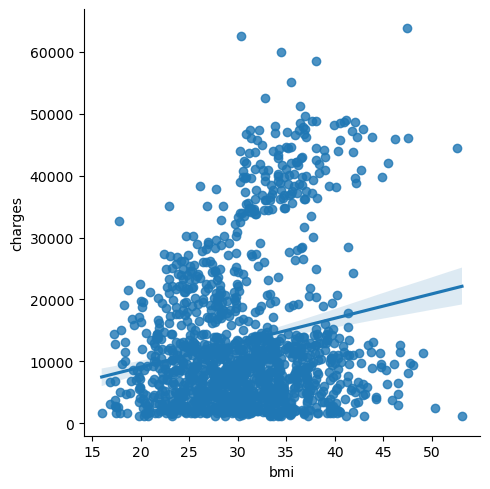

In [67]:
# Bmi v. charges shows somewhat of an upward trend. However, like age, this appears to be divided into two tiers.

sns.lmplot(insurance, x = "bmi", y = "charges")


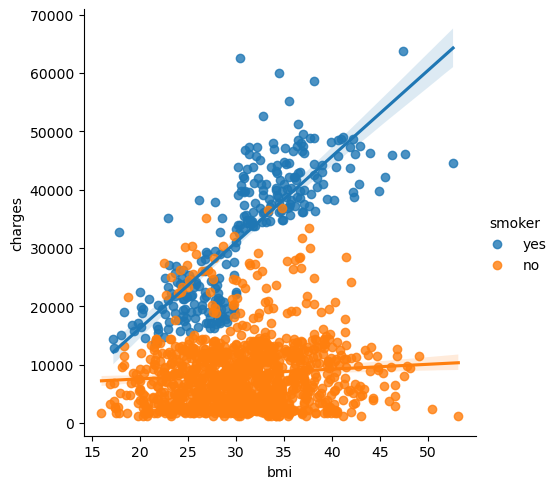

In [16]:
#bmi v. charges with smoker status shows a far more drastic increase based on smoker status. Again, indicating that smoking is likely a huge factor!

sns.lmplot(insurance, x = "bmi", y = "charges", hue = 'smoker')

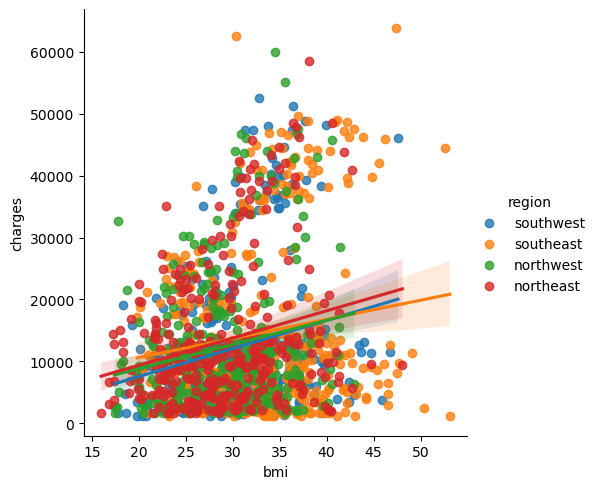

In [17]:
# region didn't show anything particularly obvious or noteworthy

sns.lmplot(insurance, x = "bmi", y = "charges", hue = 'region')

### 4. Simple Linear Regression

After exploring the data, I was ready to implement a VERY basic simple linear regression model, using the statsmodels api. I used "age" as the feature to predict charges. <br><br> Let's see what happened...

In [18]:
# import libraries

import statsmodels.api as sm

In [19]:
#create the model

X = sm.add_constant(insurance["age"])
y = insurance["charges"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           4.89e-29
Time:                        11:05:39   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4.a. OK...What does this mean?

Under coeficient, the regression results shoed  me that the coeficient for my model was 3165.8850, and the slope for my model was 257.7226. <br><br>This can be interpreted as saying: a 1-year increase in age was associated with a $257 increase in insurance charges.* And, also, in other words, the equation for my predictions was: y = 3165.8850 + 257(x)

Next, I used the .predict() method to see some outcomes.

*Thank you Maven Analytics for breaking this down so clearly!!!

In [20]:
#testing the model to see what it predicted for a 25 year-old.

model.predict([1, 25])

#The model predicted that a 25 year-old will have $9608 in insurance costs

array([9608.95047274])

In [21]:
#out of curiosity, I wanted to compare this to the mean charges for all 25 year-olds in the dataset. 

df_age_25 = insurance[insurance['age'] == 25]

df_age_25["charges"].mean()

#The mean was about $200 more than the prediction. 
#So, the model was certainly doing something differently than just calculating the mean!

9838.365310714285

In [22]:
#Next I wanted to see the predictions for a small dataframe of ages

ages = sm.add_constant(pd.DataFrame({"ages": [25, 35, 45, 55, 65, 75]}))
model.predict(ages)

0     9608.950473
1    12186.176659
2    14763.402846
3    17340.629033
4    19917.855219
5    22495.081406
dtype: float64

<Axes: xlabel='predicted price', ylabel='residual'>

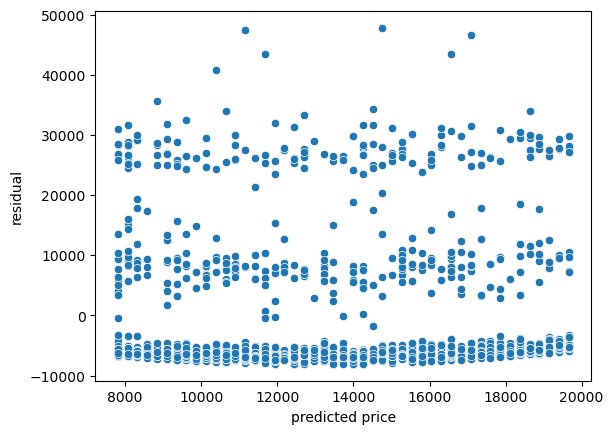

In [45]:
#finally, for this exercise, I plotted the residuals to see how our predictions were looking

residuals = pd.DataFrame(
    {
    "age": insurance["age"],
    "charges": insurance["charges"],
    "predicted price": model.predict(), 
    "residual": model.resid
    }
)

sns.scatterplot(residuals, x = "predicted price", y = "residual")

#Overall the residuals appeared to be segmented into three tiers. 
#My guess would be that this is related to smoker status.
#Perhaps the model is predicting charges that are too low for smokers, and too high for non-smokers.

#### 5. Conclusions and next steps

- Overall, there was, indeed a positive correlation between age and insurance charges, however, the correlation was fairly weak.
- Smoking appeared to have a dramatic impact on overall charges, and certainly worth exploring more - especially as I learn how to implement a multiple linear regression.
- I found it interesting that the mean charges for the southeast region were higher than any other region. This would ceratinly be worth exploring more.
- A simple linear regression used to predict charges for age seemed to be decent, but could, of course, use more refinement, which I can implement as I learn more about multiple linear regression.
- The residual plot indicated that the model is not super helpful, however, once again, accounting for smoker status could do a lot in terms of improving the model.